In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

/Users/Hoffmann/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
data_path = os.path.join(os.getcwd(), 'datasets', 'spambase.csv')
spambase = pd.read_csv(data_path, delimiter=',')

In [3]:
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0


In [4]:
spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [8]:
spambase.iloc[:] # displays all the rows

pandas.core.frame.DataFrame

In [7]:
spambase.iloc[0,0]

0.0

In [9]:
spambase.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [10]:
spambase.size

266858

In [11]:
len(spambase) # number of rows

4601

In [15]:
len(spambase.columns)

58

In [16]:
spambase.shape[1]

58

In [17]:
spambase.describe()[1:3]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698


In [20]:
spambase.drop(['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total'], axis=1, inplace=True)

In [21]:
len(spambase.columns)

55

In [37]:
is_spam = spambase['is_spam']

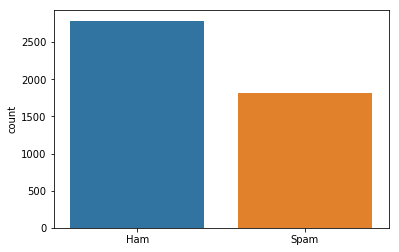

In [50]:
ax = sns.countplot(x="is_spam", data=spambase)
ax.set_xticklabels(['Ham','Spam'])
ax.xaxis.label.set_visible(False)
plt.show()

In [51]:
spambase_binary = spambase.copy(deep=True)

In [52]:
spambase_binary.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,1.0


In [74]:
'word_freq_make' in spambase.columns

True

In [72]:
import copy

b = [int(x) for x in (spambase_binary['word_freq_make'] > 0)]
spambase_binary['word_freq_make'] = copy.deepcopy(b)
spambase_binary.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,is_spam
0,0,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,1.0
1,1,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,1.0
2,1,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,1.0
3,0,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,1.0
4,0,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,1.0


In [75]:
for attribute in spambase_binary.columns:
    b = [int(x) for x in (spambase_binary[attribute] > 0)]
    spambase_binary[attribute] = copy.deepcopy(b)
    
spambase_binary.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,is_spam
4596,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4598,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
4599,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4600,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [76]:
spambase_binary.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,is_spam
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,1,1,0,1,1,1,1,0,1,...,0,0,0,0,1,0,1,1,1,1
2,1,0,1,0,1,1,1,1,1,1,...,1,0,0,1,1,0,1,1,1,1
3,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,1


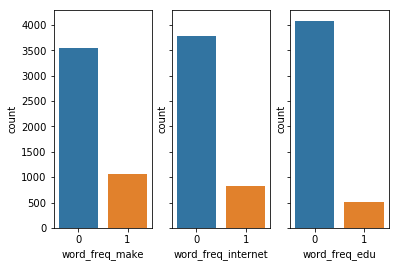

In [82]:
fig, axs = plt.subplots(ncols=3, sharey=True)
sns.countplot(x='word_freq_make', data=spambase_binary, ax=axs[0])
sns.countplot(x='word_freq_internet', data=spambase_binary, ax=axs[1])
sns.countplot(x='word_freq_edu', data=spambase_binary, ax=axs[2])
plt.show()

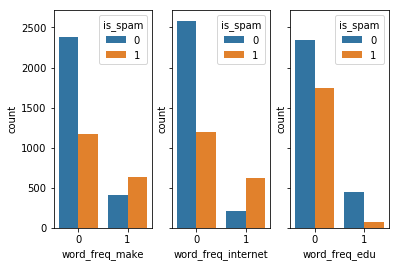

In [83]:
fig, axs = plt.subplots(ncols=3, sharey=True)
sns.countplot(x='word_freq_make', data=spambase_binary, hue='is_spam', ax=axs[0])
sns.countplot(x='word_freq_internet', data=spambase_binary, hue='is_spam', ax=axs[1])
sns.countplot(x='word_freq_edu', data=spambase_binary, hue='is_spam', ax=axs[2])
plt.show()

In [84]:
X = spambase_binary.drop(['is_spam'], axis=1)
len(X.columns)

54

In [85]:
y = spambase_binary['is_spam']
len(y)

4601

In [86]:
X.shape

(4601, 54)

In [87]:
y.shape

(4601,)

In [88]:
clf = MultinomialNB()
clf.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [89]:
clf.class_log_prior_

array([-0.50094918, -0.93129074])

In [90]:
clf.predict(X)

array([1, 1, 1, ..., 0, 0, 0])

In [91]:
clf.score(X,y)

0.8924146924581613

In [93]:
cm = confusion_matrix(y, clf.predict(X))

In [94]:
cm = [x/sum(x) for x in cm]
cm

[array([0.8651363, 0.1348637]), array([0.06563707, 0.93436293])]

In [95]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

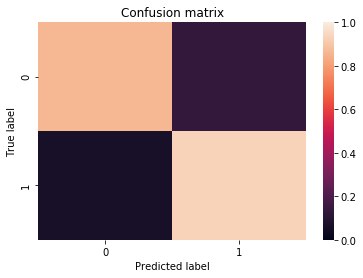

In [96]:
plot_confusion_matrix(cm)

In [112]:
clf.feature_log_prob_

array([[-3.98858041, -4.3988999 , -3.36045613, -7.81480343, -3.59040574,
        -4.2468369 , -6.22783837, -4.68415184, -4.62295628, -3.84661015,
        -5.04918338, -2.93621914, -4.20388552, -5.16784092, -6.100005  ,
        -4.47863852, -4.42477935, -4.15124178, -2.62184658, -6.140827  ,
        -3.14718023, -6.87653379, -5.65531918, -6.00469482, -3.06409094,
        -3.34634429, -3.36174896, -3.93898347, -4.12315005, -3.89834583,
        -4.33870474, -4.69390801, -4.16848359, -4.68415184, -3.92525328,
        -3.8217126 , -3.42035427, -6.06078429, -4.23437568, -4.48259892,
        -5.01481573, -4.23747646, -4.33870474, -4.37367334, -3.29664462,
        -3.90278042, -6.20536552, -4.77558604, -3.7581992 , -2.67313987,
        -4.02056346, -3.39462503, -4.3352742 , -4.5739487 ],
       [-3.58917099, -3.61440892, -3.03625315, -6.36487984, -3.01937136,
        -3.52872963, -3.41388346, -3.62403981, -3.732991  , -3.33474614,
        -3.71163787, -3.01147312, -3.79800925, -4.60702192, -4.

In [113]:
clf.feature_log_prob_
l = [x>y for (x,y) in zip(clf.feature_log_prob_[0],clf.feature_log_prob_[1])]
len(l)

54

In [114]:
spambase.columns[:54][l]

Index(['word_freq_will', 'word_freq_you', 'word_freq_hp', 'word_freq_hpl',
       'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
       'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415',
       'word_freq_85', 'word_freq_technology', 'word_freq_1999',
       'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs',
       'word_freq_meeting', 'word_freq_original', 'word_freq_project',
       'word_freq_re', 'word_freq_edu', 'word_freq_table',
       'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_['],
      dtype='object')

In [115]:
spambase_test = pd.read_csv(os.path.join(os.getcwd(),'datasets','spambase_test.csv'), delimiter=',')

In [118]:
spambase_test.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,is_spam
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [119]:
X = spambase_test.drop(['is_spam'], axis=1)

In [120]:
y = spambase_test['is_spam']

In [121]:
clf_test = MultinomialNB()
clf_test.fit(X,y)

/Users/Hoffmann/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/naive_bayes.py:461: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [122]:
clf_test.predict(X)

array([1])